In [1]:
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

# for regression
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statistics import mean
import subprocess # from mdbtools

stats_mdb = "stats.mdb"
tables = subprocess.check_output(["mdb-tables", stats_mdb]).decode().split()

# exploratory table name inquiry
print(tables) # Amber is an online conversion tool default

['Amber']


## Problem Statement
### 3.b
Everyone loves a shiny new toy, and baseball GMs are no different.  But is there a material benefit to throwing all your eggs in a young-kid-basket?  The data is set up to test the hypothesis--are younger players better?  Or asked another way: What is a baseball player's prime age?  The response variable will be wOBA which stands for weighted on-base average.  This is an advanced statistic based on linear weights designed to measure a player's overall offensive contributions per plate appearance.  The weights are based on observed run values for individual events, league-wide, and vary year to year.  The data was taken from baseballsavant.mlb.com, exported to .csv, converted online to .mdb, and assuaged in the notebook.

In [2]:
stats_table = "Amber"

def convert_mdb2df(file, table) -> pd.DataFrame:
    d = subprocess.check_output(["mdb-export", file, table]).decode().split("\n")
    # first row has arbitrary letter designators, 2nd row has column names
    # online conversion added extraneous string characters that needed to be removed
    columns = d[1].replace('"', '').split(',')
    data = [i.replace('"', '').split(',') for i in d[2:]] # data starts in row 3
    df = pd.DataFrame(columns=columns, data=data)
    return df

df = convert_mdb2df(file=stats_mdb, table=stats_table).dropna(axis=0)

# df.columns


All data decodes as string, need to convert number columns appropriately

In [3]:
# required to recast object types

df.player_age = df.player_age.astype(int)

df[["slg_percent", "on_base_percent", "woba", "exit_velocity_avg", "barrel_batted_rate", "hard_hit_percent"]] = df[["slg_percent", "on_base_percent", "woba", "exit_velocity_avg", "barrel_batted_rate", "hard_hit_percent"]].astype(float)
print(df.dtypes)

last_name              object
first_name             object
player_id              object
year                   object
player_age              int64
slg_percent           float64
on_base_percent       float64
woba                  float64
exit_velocity_avg     float64
barrel_batted_rate    float64
hard_hit_percent      float64
dtype: object


## Data Understanding & Figures
### 2.a

In [4]:
df.sort_values(by=['woba'], ascending=False).head()

,last_name,first_name,player_id,year,player_age,slg_percent,on_base_percent,woba,exit_velocity_avg,barrel_batted_rate,hard_hit_percent
626,Soto,Juan,665742,2020,21,0.695,0.490,0.478,92.1,18.3,51.6
256,Harper,Bryce,547180,2015,22,0.649,0.460,0.461,91.4,12.9,47.5
732,Judge,Aaron,592450,2022,30,0.686,0.422,0.458,95.9,26.5,61.8
559,Freeman,Freddie,518692,2020,30,0.640,0.462,0.456,92.4,14.7,54.2
110,Betts,Mookie,605141,2018,25,0.640,0.438,0.449,92.2,14.1,50.6


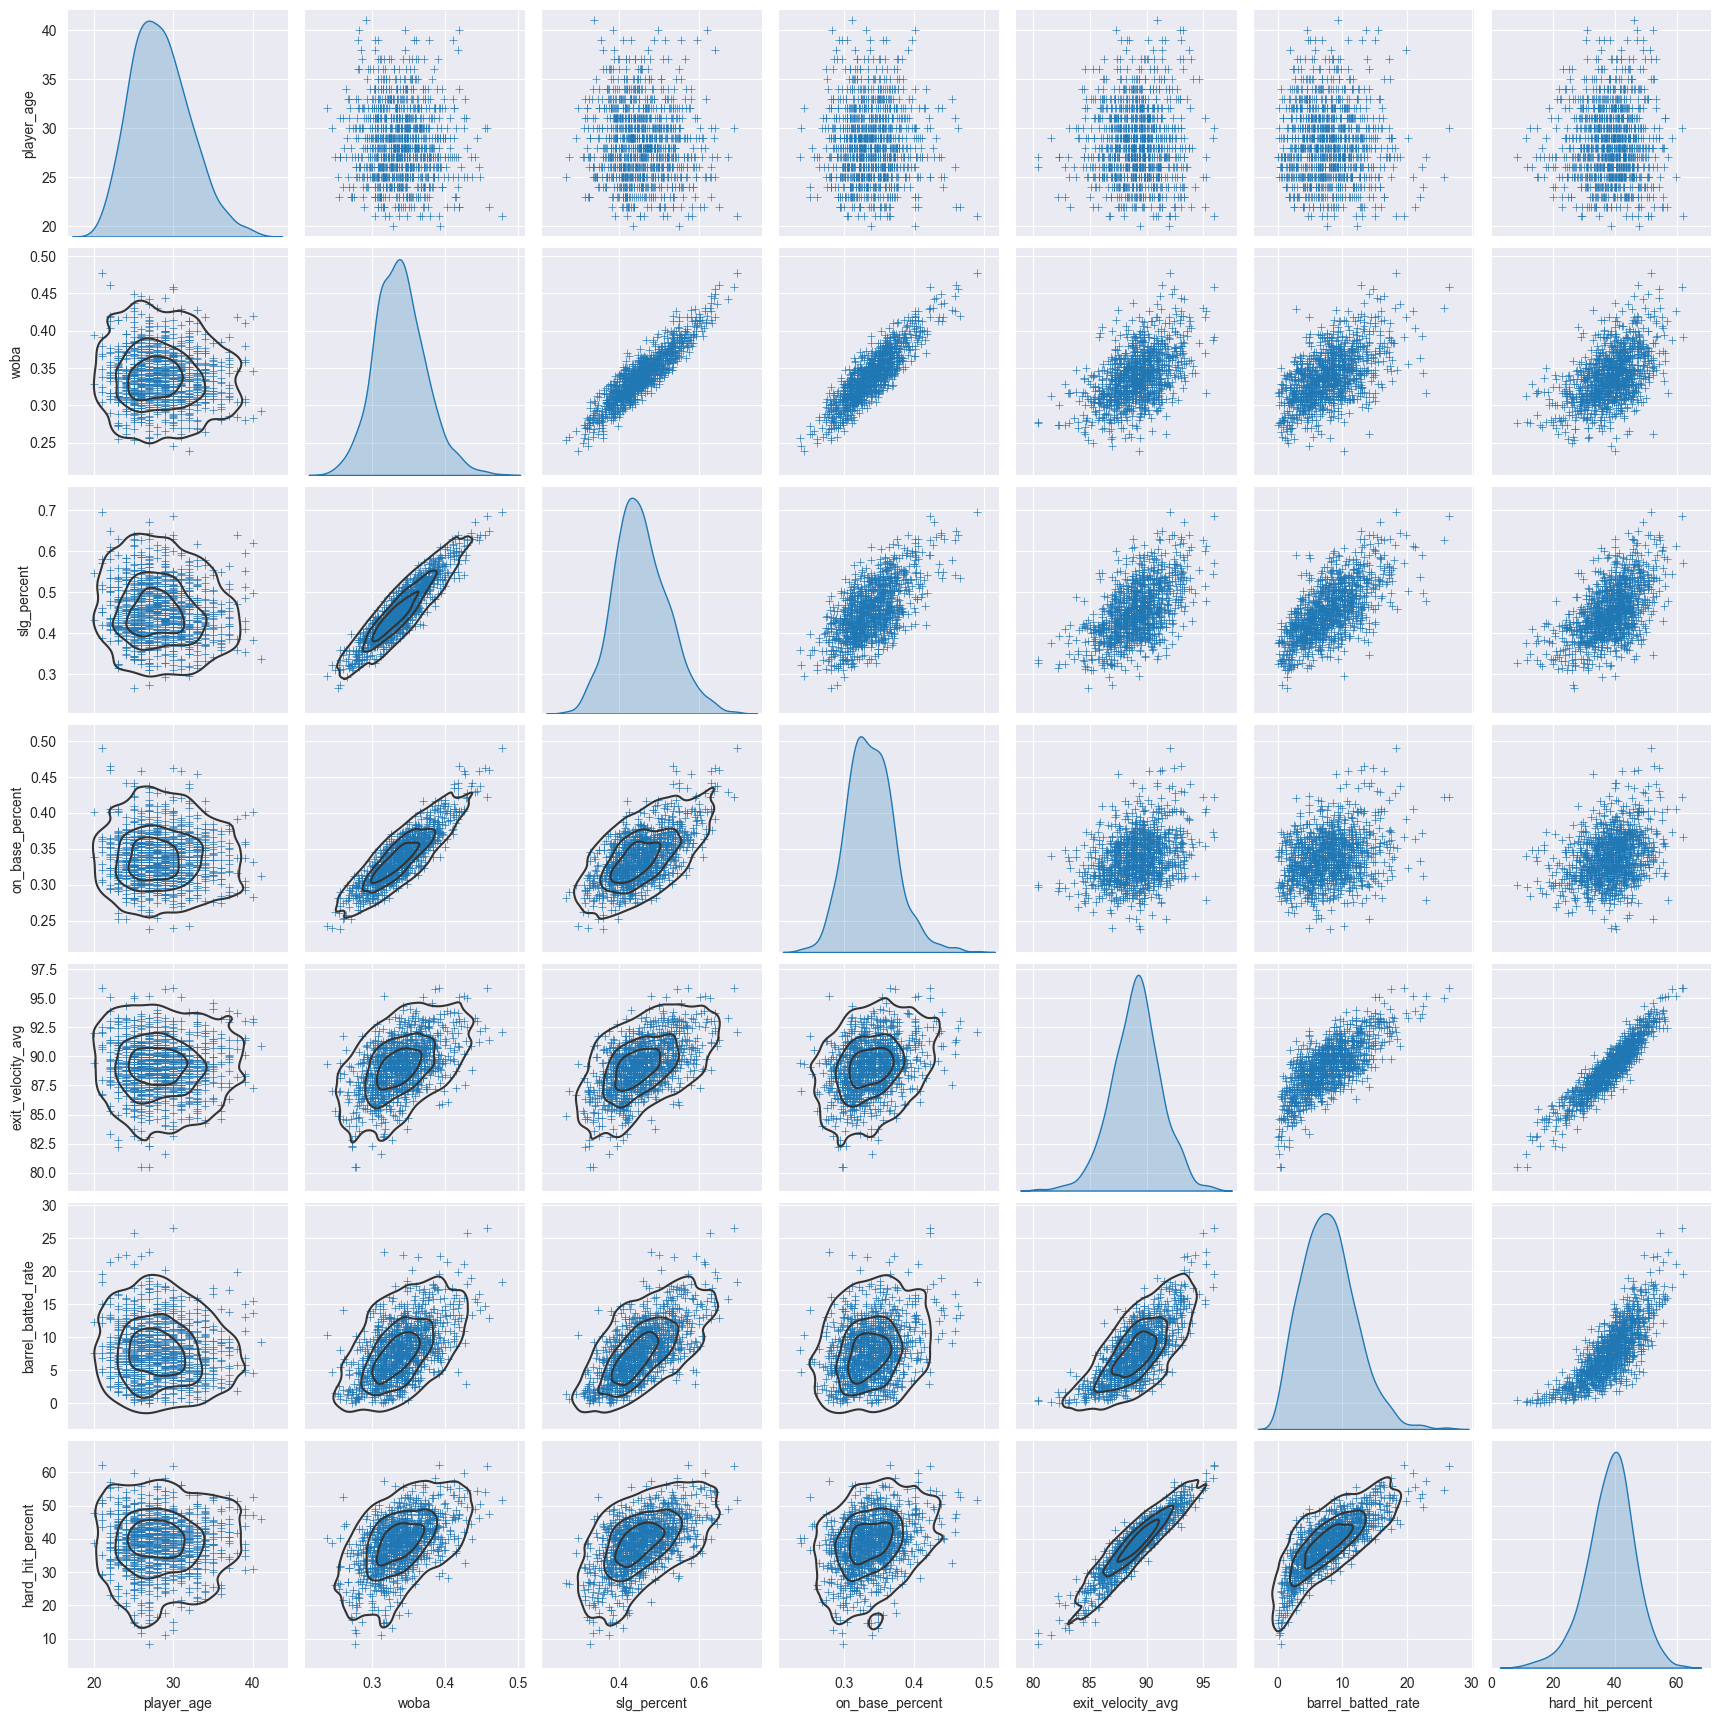

In [12]:
g = sns.pairplot(data=df, vars=["player_age", "woba", "slg_percent", "on_base_percent", "exit_velocity_avg", "barrel_batted_rate", "hard_hit_percent"], diag_kind="kde", markers="+")
g.map_lower(sns.kdeplot, levels=4, color=".2")

<AxesSubplot:xlabel='player_age', ylabel='woba'>

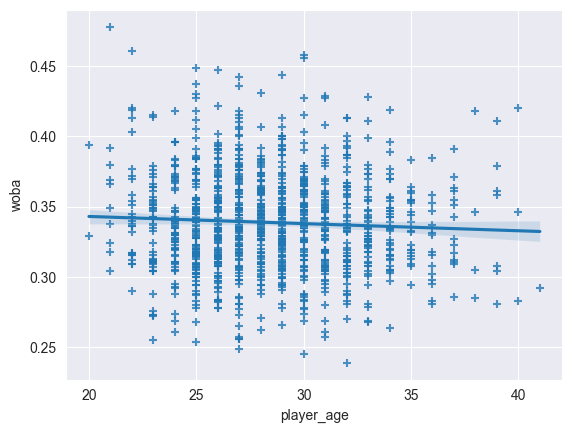

In [16]:
sns.regplot(x=df.player_age, y=df.woba, marker="+")

## Full Model
### 2.b

## p-test selection
### 2.c
i. In a code comment, mention your criteria for selecting the best p-test model.
ii. Display a model summary of the best p-test model.

## AIC Selection
### 2.d
i. Use the “AIC Analysis” code to find the best model using AIC. ii. Display a model summary of the best AIC model.

## RFE
### 2.e
i. In a code comment, mention your criteria for selecting the best RFE model.
ii. Display a model summary of the best RFE model.

## Modeling Evaluation
### 3.c